# sklearn.tree.DecisionTreeClassifier
- class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris=load_iris()
x=iris.data
y=iris.target

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=112)

In [3]:
dt_clf_3=DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf_3.fit(x_train, y_train)
pred=dt_clf_3.predict(x_test)

accuracy_score(y_test, pred)

0.9666666666666667

In [4]:
dt_clf_3.classes_

array([0, 1, 2])

In [5]:
dt_clf_3.feature_importances_

array([0.        , 0.        , 0.62769356, 0.37230644])

In [6]:
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train)
pred=dt_clf.predict(x_test)

accuracy_score(y_test, pred)

1.0

In [7]:
dt_clf.feature_importances_

array([0.01252348, 0.        , 0.60026011, 0.3872164 ])

In [8]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [9]:
iris.target[0]

0

In [10]:
!pip install graphviz


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf_3 , out_file='output_3.dot', feature_names=iris.feature_names ,class_names=iris.target_names , impurity=True , filled=True )
export_graphviz(dt_clf, out_file='output.dot', feature_names=iris.feature_names ,class_names=iris.target_names, impurity=True , filled=True)

In [12]:
import graphviz

with open("output_3.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Feature importances:
[0.013 0.    0.6   0.387]
sepal length (cm):0.013
sepal width (cm):0.000
petal length (cm):0.600
petal width (cm):0.387


<Axes: >

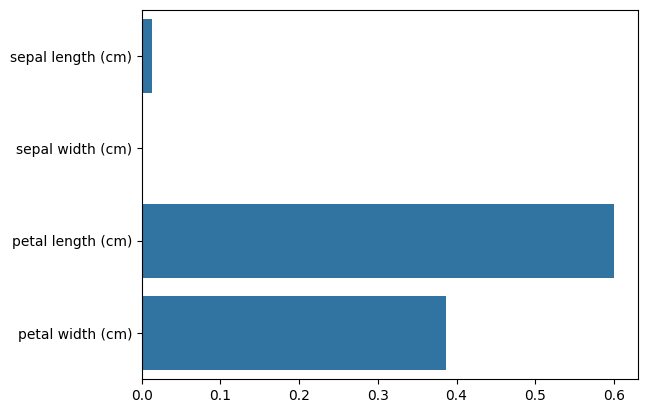

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))

# feature별 importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

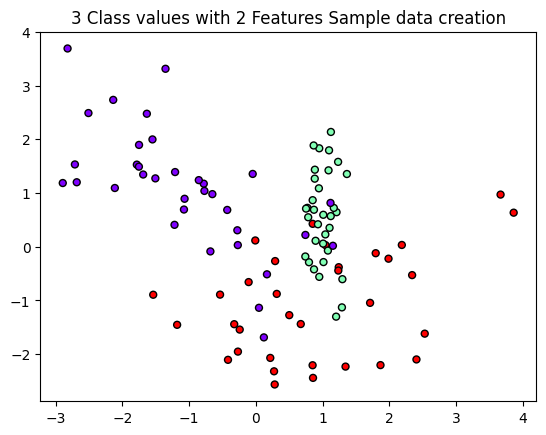

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
x_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2,
                                         n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시
plt.scatter(x_features[:,0], x_features[:,1],marker='o', c=y_labels, s=25, cmap='rainbow',edgecolor='k')

In [31]:
import numpy as np

def visualize_boundary (model, x, y) :
    fig, ax = plt.subplots()
    
    ax.scatter(x[:,0], x[:,1], c=y, s=25, cmap='rainbow', edgecolor='k', clim = (y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    model.fit(x, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = 'rainbow', clim = (y.min(), y.max()), zorder = 1)

C:\Users\82105\AppData\Local\Temp\ipykernel_287112\4076660808.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = 'rainbow', clim = (y.min(), y.max()), zorder = 1)


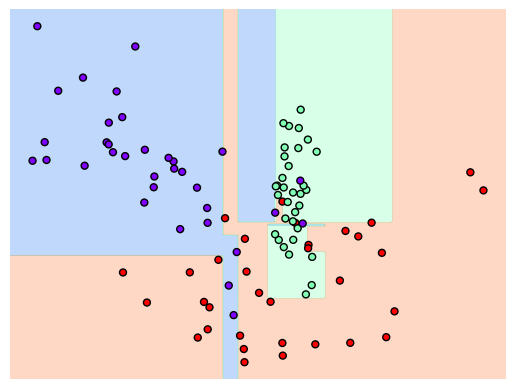

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
visualize_boundary(dt_clf, x_features, y_labels)